In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

import time

In [2]:
cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']
print(target.value_counts())

4    1210
3     384
2      69
1      65
Name: class, dtype: int64


In [4]:
cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

In [6]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1296
1296
432
432


In [7]:
target.value_counts()

4    1210
3     384
2      69
1      65
Name: class, dtype: int64

In [8]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A2/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Random Optimization Methods Basic Exploration

In [9]:
import numpy as np
import mlrose_hiive as mlr
import mlrose_hiive.runners as runners
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [10]:
rhc_nn = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

In [11]:
one_hot = OneHotEncoder()
y_train_hot = one_hot.fit_transform(Y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(Y_test.values.reshape(-1, 1)).todense()

rhc_nn.fit(X_train_std, y_train_hot)

NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
       clip_max=5, curve=False, early_stopping=True, hidden_nodes=[100],
       is_classifier=True, learning_rate=0.0001, max_attempts=100,
       max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=3,
       restarts=0,
       schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [12]:
# Predict labels for train set and assess accuracy
y_train_pred = rhc_nn.predict(X_train_std)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = rhc_nn.predict(X_test_std)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.1095679012345679
0.125


In [13]:
#baseline gradient descent implementation

grad_nn = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)
grad_nn.fit(X_train_std, y_train_hot)

# Predict labels for train set and assess accuracy
y_train_pred = grad_nn.predict(X_train_std)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = grad_nn.predict(X_test_std)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

1.0
0.9513888888888888


In [14]:
sa_nn = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)
sa_nn.fit(X_train_std, y_train_hot)

# Predict labels for train set and assess accuracy
y_train_pred = sa_nn.predict(X_train_std)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = sa_nn.predict(X_test_std)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.1095679012345679
0.125


In [15]:
ga_nn = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)
ga_nn.fit(X_train_std, y_train_hot)

# Predict labels for train set and assess accuracy
y_train_pred = ga_nn.predict(X_train_std)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = ga_nn.predict(X_test_std)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7785493827160493
0.7523148148148148


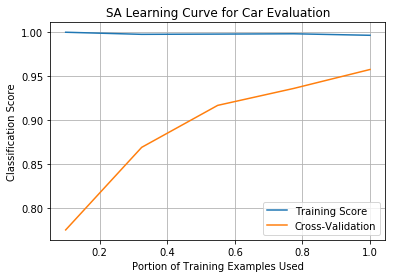

In [16]:
train_sizes, train_scores, test_scores = learning_curve(grad_nn, X_train, y_train_hot, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('SA Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

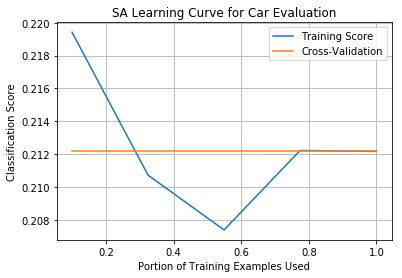

In [17]:
train_sizes, train_scores, test_scores = learning_curve(sa_nn, X_train, y_train_hot, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('SA Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

### Random Optimization Methods Comparison

In [18]:
import numpy as np
import mlrose_hiive as mlr
import mlrose_hiive.runners as runners
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import sklearn.metrics as metrics

acc = metrics.accuracy_score

one_hot = OneHotEncoder()
y_train_hot = one_hot.fit_transform(Y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(Y_test.values.reshape(-1, 1)).todense()

In [19]:
# Gradient Descent Implementation

grad_nn = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)
time_grad_0 = time.time()
grad_nn.fit(X_train_std, y_train_hot)
time_grad_train = time.time() - time_grad_0

# Train predictions
time_grad_1 = time.time()
grad_nn_train_pred = grad_nn.predict(X_train_std)
time_grad_test = time.time() - time_grad_1
grad_nn_train_accuracy = acc(y_train_hot, grad_nn_train_pred)
print(grad_nn_train_accuracy)


# Test predictions
grad_nn_test_pred = grad_nn.predict(X_test_std)
grad_nn_test_accuracy = acc(y_test_hot, grad_nn_test_pred)

print(grad_nn_test_accuracy)
print(time_grad_train)
print(time_grad_test)

1.0
0.9513888888888888
10.363702058792114
0.002424001693725586


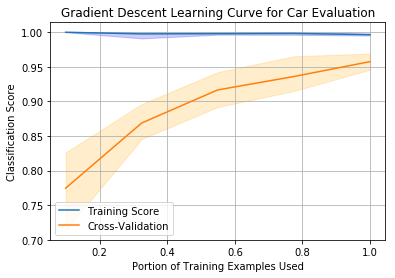

<Figure size 432x288 with 0 Axes>

In [20]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(grad_nn, X_train, y_train_hot, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.fill_between(train_sizes/train_sizes[-1], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(train_sizes/train_sizes[-1], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('Gradient Descent Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/gd_lc.png')
plt.show()


<Figure size 432x288 with 0 Axes>

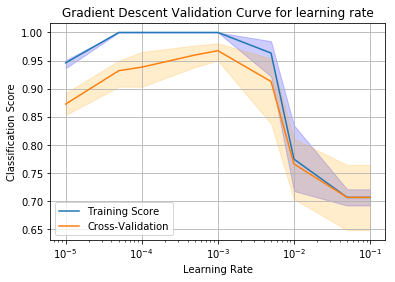

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

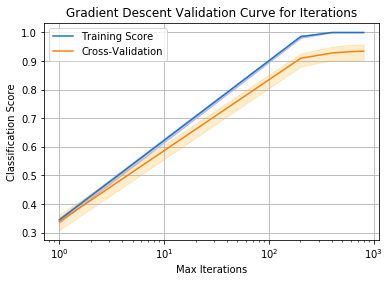

<Figure size 432x288 with 0 Axes>

In [21]:
# Validation Curves for Iteration, Learning Rate
plt.figure()
train_scores, test_scores = validation_curve(grad_nn, X_train_std, y_train_hot, param_name="learning_rate", param_range=[.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], avg_train_score, label='Training Score')
plt.semilogx([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], avg_test_score, label='Cross-Validation')

plt.fill_between([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('Gradient Descent Validation Curve for learning rate')
plt.xlabel('Learning Rate')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/gd_lr.png')
plt.show()


plt.figure()
train_scores, test_scores = validation_curve(grad_nn, X_train_std, y_train_hot, param_name="max_iters", param_range=range(1,1001,200), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(range(1,1001,200), avg_train_score, label='Training Score')
plt.semilogx(range(1,1001,200), avg_test_score, label='Cross-Validation')

plt.fill_between(range(1,1001,200), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(range(1,1001,200), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('Gradient Descent Validation Curve for Iterations')
plt.xlabel('Max Iterations')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/gd_it.png')
plt.show()



In [22]:
# check confusion matrix for gradient descent baseline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, one_hot.inverse_transform(grad_nn_test_pred)))

[[ 16   2   2   0]
 [  1  12   2   0]
 [  1   6  90   6]
 [  1   0   0 293]]


In [23]:
# RHC implementation

rhc_nn = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)


<Figure size 432x288 with 0 Axes>

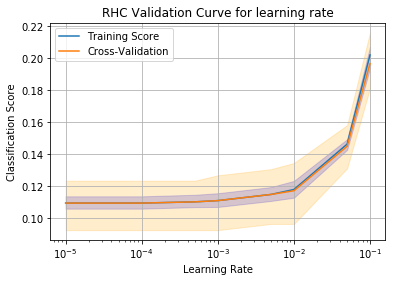

<Figure size 432x288 with 0 Axes>

In [24]:
# Validation Curves for Iteration, Learning Rate
plt.figure()
train_scores, test_scores = validation_curve(rhc_nn, X_train_std, y_train_hot, param_name="learning_rate", param_range=[.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], avg_train_score, label='Training Score')
plt.semilogx([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], avg_test_score, label='Cross-Validation')

plt.fill_between([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('RHC Validation Curve for learning rate')
plt.xlabel('Learning Rate')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()
plt.savefig('plots/rhc_lr.png')



<Figure size 432x288 with 0 Axes>

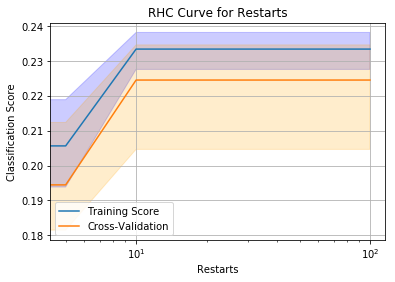

In [26]:
plt.figure()
train_scores, test_scores = validation_curve(rhc_nn, X_train_std, y_train_hot, param_name="restarts", param_range=[0,5,10,50,100], cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx([0,5,10,50,100], avg_train_score, label='Training Score')
plt.semilogx([0,5,10,50,100], avg_test_score, label='Cross-Validation')

plt.fill_between([0,5,10,50,100], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between([0,5,10,50,100], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('RHC Curve for Restarts')
plt.xlabel('Restarts')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/rhc_restarts.png')
plt.show()



<Figure size 432x288 with 0 Axes>

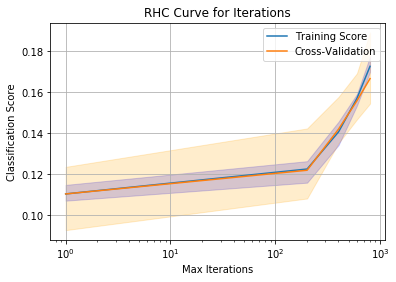

In [27]:
plt.figure()
train_scores, test_scores = validation_curve(rhc_nn, X_train_std, y_train_hot, param_name="max_iters", param_range=range(1,1001,200), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(range(1,1001,200), avg_train_score, label='Training Score')
plt.semilogx(range(1,1001,200), avg_test_score, label='Cross-Validation')

plt.fill_between(range(1,1001,200), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(range(1,1001,200), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('RHC Curve for Iterations')
plt.xlabel('Max Iterations')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/rhc_it.png')
plt.show()

In [28]:
# Final performance with best hyperparams
rhc_nn_final = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)
time_rhc_0 = time.time()
rhc_nn_final.fit(X_train_std, y_train_hot)
time_rhc_train = time.time() - time_rhc_0
# Train predictions
time_rhc_1 = time.time()
rhc_nn_train_pred = rhc_nn_final.predict(X_train_std)
time_rhc_test = time.time() - time_rhc_1
rhc_nn_train_accuracy = acc(y_train_hot, rhc_nn_train_pred )
print(rhc_nn_train_accuracy)


# Test predictions
rhc_nn_test_pred = rhc_nn_final.predict(X_test_std)
rhc_nn_test_accuracy = acc(y_test_hot, rhc_nn_test_pred )

print(rhc_nn_test_accuracy)
print(confusion_matrix(Y_test, one_hot.inverse_transform(rhc_nn_test_pred )))

print(time_rhc_train)
print(time_rhc_test)

0.19907407407407407
0.2222222222222222
[[ 12   6   1   1]
 [  8   5   2   0]
 [ 52   8  27  16]
 [119  48  75  52]]
5.242589950561523
0.0025069713592529297


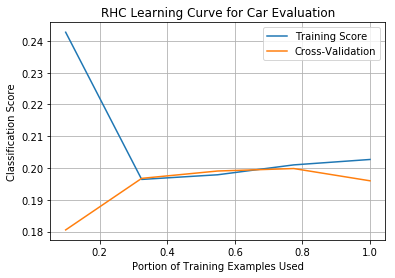

In [37]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rhc_nn_final, X_train_std, y_train_hot, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('RHC Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/rhc_lc.png')
plt.show()


In [38]:
# SA implementation

sa_nn = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)


<Figure size 432x288 with 0 Axes>

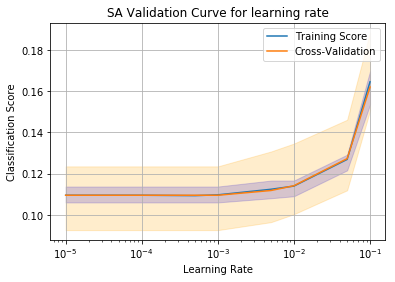

<Figure size 432x288 with 0 Axes>

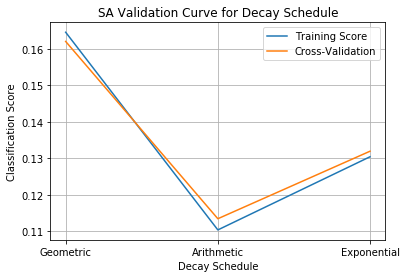

<Figure size 432x288 with 0 Axes>

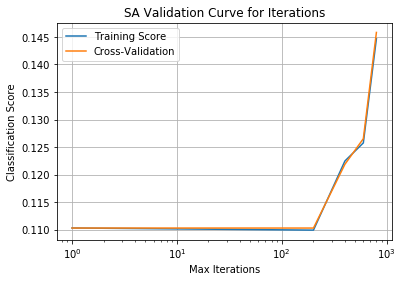

In [39]:
# Validation Curves for Iteration, Learning Rate
plt.figure()
train_scores, test_scores = validation_curve(sa_nn, X_train_std, y_train_hot, param_name="learning_rate", param_range=[.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], avg_train_score, label='Training Score')
plt.semilogx([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], avg_test_score, label='Cross-Validation')

plt.fill_between([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('SA Validation Curve for learning rate')
plt.xlabel('Learning Rate')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/sa_lr.png')
plt.show()


plt.figure()
train_scores, test_scores = validation_curve(sa_nn, X_train_std, y_train_hot, param_name="schedule", param_range=[mlr.GeomDecay(),mlr.ArithDecay(), mlr.ExpDecay()], cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.plot(['Geometric', 'Arithmetic', 'Exponential'], avg_train_score, label='Training Score')
plt.plot(['Geometric', 'Arithmetic', 'Exponential'], avg_test_score, label='Cross-Validation')

plt.title('SA Validation Curve for Decay Schedule')
plt.xlabel('Decay Schedule')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/sa_sched.png')
plt.show()


plt.figure()
train_scores, test_scores = validation_curve(sa_nn, X_train_std, y_train_hot, param_name="max_iters", param_range=range(1,1001,200), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(range(1,1001,200), avg_train_score, label='Training Score')
plt.semilogx(range(1,1001,200), avg_test_score, label='Cross-Validation')

plt.title('SA Validation Curve for Iterations')
plt.xlabel('Max Iterations')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/sa_it.png')
plt.show()


In [40]:
# Final performance with best hyperparams
sa_nn_final = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)
time_sa_0 = time.time()
sa_nn_final.fit(X_train_std, y_train_hot)
time_sa_train = time.time() - time_sa_0
# Train predictions
time_sa_1 = time.time()
sa_nn_train_pred = sa_nn_final.predict(X_train_std)
time_sa_test = time.time() - time_sa_1
sa_nn_train_accuracy = acc(y_train_hot, sa_nn_train_pred )
print(sa_nn_train_accuracy)


# Test predictions
sa_nn_test_pred = sa_nn_final.predict(X_test_std)
sa_nn_test_accuracy = acc(y_test_hot, sa_nn_test_pred )

print(sa_nn_test_accuracy)
print(confusion_matrix(Y_test, one_hot.inverse_transform(sa_nn_test_pred)))

print(time_sa_train)
print(time_sa_test)

0.16358024691358025
0.19675925925925927
[[ 13   4   1   2]
 [  5   5   5   0]
 [ 48   8  34  13]
 [112  54  95  33]]
6.671256065368652
0.0027000904083251953


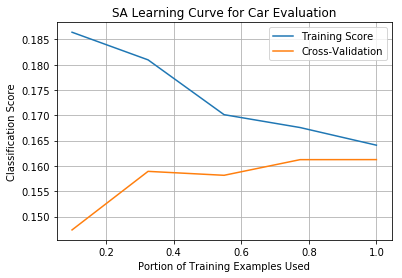

In [41]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(sa_nn_final, X_train_std, y_train_hot, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('SA Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/sa_lc.png')
plt.show()


In [42]:
# GA implementation

ga_nn = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 100, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

<Figure size 432x288 with 0 Axes>

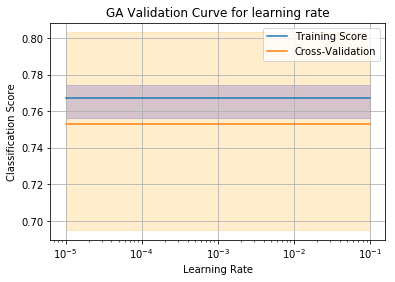

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [35]:
# Validation Curves for Iteration, Learning Rate
plt.figure()
train_scores, test_scores = validation_curve(ga_nn, X_train_std, y_train_hot, param_name="learning_rate", param_range=[.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], avg_train_score, label='Training Score')
plt.semilogx([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], avg_test_score, label='Cross-Validation')

plt.fill_between([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between([.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('GA Validation Curve for learning rate')
plt.xlabel('Learning Rate')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/ga_lr.png')
plt.show()


plt.figure()
train_scores, test_scores = validation_curve(ga_nn, X_train_std, y_train_hot, param_name="pop_size", param_range=range(50,201,50), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(range(50,201,50), avg_train_score, label='Training Score')
plt.semilogx(range(50,201,50), avg_test_score, label='Cross-Validation')

plt.fill_between(range(50,201,50), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(range(50,201,50), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('GA Validation Curve for Population')
plt.xlabel('Population')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/ga_pop.png')
plt.show()


plt.figure()
train_scores, test_scores = validation_curve(ga_nn, X_train_std, y_train_hot, param_name="mutation_prob", param_range=[.1, .2, .3, .4, .5], cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.plot([.1, .2, .3, .4, .5], avg_train_score, label='Training Score')
plt.plot([.1, .2, .3, .4, .5], avg_test_score, label='Cross-Validation')

plt.fill_between([.1, .2, .3, .4, .5], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between([.1, .2, .3, .4, .5], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('GA Validation Curve for Mutation')
plt.xlabel('Mutation Probability')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/ga_mut.png')
plt.show()

In [ ]:
# Final performance with best hyperparams
ga_nn_final = mlr.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)
time_ga_0 = time.time()
ga_nn_final.fit(X_train_std, y_train_hot)
time_ga_train = time.time() - time_ga_0

# Train predictions
time_ga_1 = time.time()
ga_nn_train_pred = ga_nn_final.predict(X_train_std)
time_ga_test = time.time() - time_ga_1

ga_nn_train_accuracy = acc(y_train_hot, ga_nn_train_pred )
print(ga_nn_train_accuracy)


# Test predictions
ga_nn_test_pred = ga_nn_final.predict(X_test_std)
ga_nn_test_accuracy = acc(y_test_hot, ga_nn_test_pred )

print(ga_nn_test_accuracy)
print(confusion_matrix(Y_test, one_hot.inverse_transform(ga_nn_test_pred)))

print(time_ga_train)
print(time_ga_test)

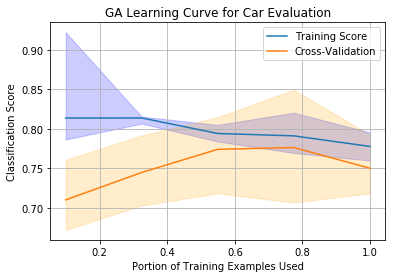

In [43]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(ga_nn, X_train, y_train_hot, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.fill_between(train_sizes/train_sizes[-1], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(train_sizes/train_sizes[-1], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('GA Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/ga_lc.png')
plt.show()


<Figure size 432x288 with 0 Axes>

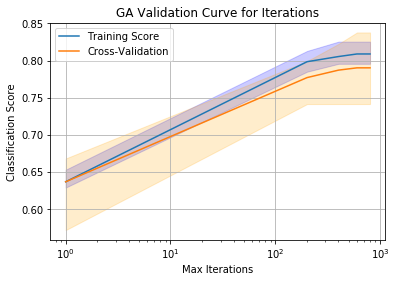

In [44]:
plt.figure()
train_scores, test_scores = validation_curve(ga_nn, X_train_std, y_train_hot, param_name="max_iters", param_range=range(1,1001,200), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(range(1,1001,200), avg_train_score, label='Training Score')
plt.semilogx(range(1,1001,200), avg_test_score, label='Cross-Validation')
plt.fill_between(range(1,1001,200), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(range(1,1001,200), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('GA Validation Curve for Iterations')
plt.xlabel('Max Iterations')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.savefig('plots/ga_it.png')
plt.show()


In [ ]:
# rhc extra plot generation
plt.figure()
train_scores, test_scores = validation_curve(rhc_nn, X_train_std, y_train_hot, param_name="restarts", param_range=[0,5,10,50,100], cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx([0,5,10,50,100], avg_train_score, label='Training Score')
plt.semilogx([0,5,10,50,100], avg_test_score, label='Cross-Validation')

plt.fill_between([0,5,10,50,100], np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between([0,5,10,50,100], np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('RHC Curve for Restarts')
plt.xlabel('Restarts')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()
plt.savefig('plots/rhc_restarts.png')


plt.figure()
train_scores, test_scores = validation_curve(rhc_nn, X_train_std, y_train_hot, param_name="max_iters", param_range=range(1,1001,200), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(range(1,1001,200), avg_train_score, label='Training Score')
plt.semilogx(range(1,1001,200), avg_test_score, label='Cross-Validation')

plt.fill_between(range(1,1001,200), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(range(1,1001,200), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('RHC Curve for Iterations')
plt.xlabel('Max Iterations')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()
plt.savefig('plots/rhc_it.png')

In [ ]:
ga_nn_final

In [ ]:
ga_nn_final.fitness_curve